In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prets = pd.read_csv('prets.csv')

prets.head()


,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


In [2]:
prets['taux_endettement'] = round(prets['remboursement'] * 100 / prets['revenu'], 2)
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux,taux_endettement
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80


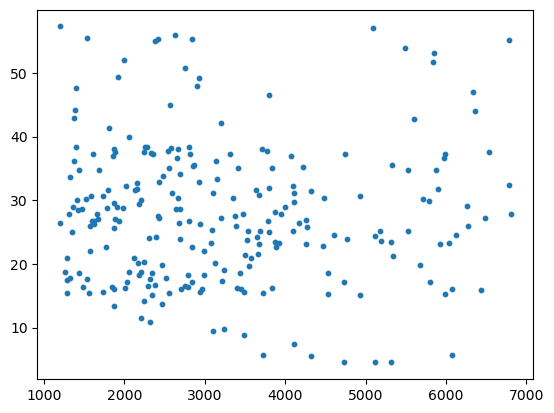

In [5]:
plt.scatter(prets['revenu'], prets['taux_endettement'], s=10)

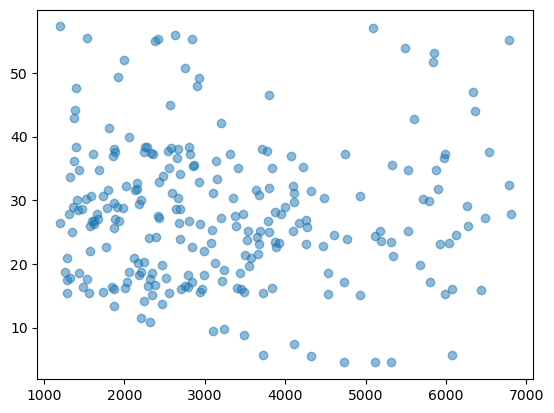

In [6]:
plt.scatter(prets['revenu'], prets['taux_endettement'],
    alpha=0.5)

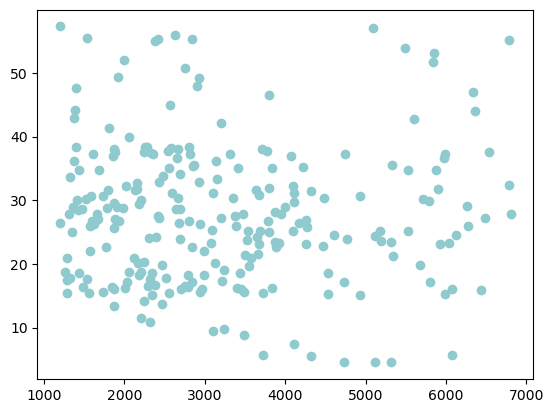

In [16]:
plt.scatter(prets['revenu'], prets['taux_endettement'], c='#8FCACF')

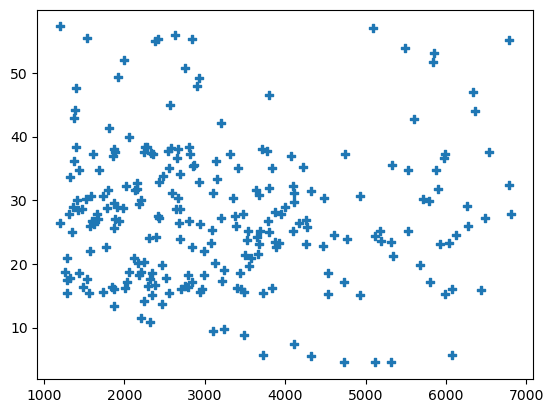

In [14]:
plt.scatter(prets['revenu'], prets['taux_endettement'],marker='P')

In [17]:
data = prets.groupby('ville')['remboursement'].sum()

data = data.reset_index()

In [19]:
data.head()

,ville,remboursement
0,BORDEAUX,15330.59
1,LYON,26064.67
2,MARSEILLE,40895.72
3,NICE,23544.24
4,PARIS,94052.61


([<matplotlib.patches.Wedge at 0x15439bec050>,
 [Text(1.0735482881610743, 0.23977921716951908, 'BORDEAUX'),
  Text(0.7559779757294925, 0.7990602606887286, 'LYON'),
  Text(-0.2207948127606491, 1.0776129410219561, 'MARSEILLE'),
  Text(-0.9928563382020422, 0.47353594551209344, 'NICE'),
  Text(-0.35667747630629365, -1.040567719034073, 'PARIS'),
  Text(1.058235353672122, -0.3002298057129555, 'TOULOUSE')],
 [Text(0.5855717935424041, 0.13078866391064675, '6.99%'),
  Text(0.41235162312517776, 0.435851051284761, '11.89%'),
  Text(-0.12043353423308131, 0.587788876921067, '18.66%'),
  Text(-0.5415580026556593, 0.2582923339156873, '10.74%'),
  Text(-0.19455135071252377, -0.5675823922004034, '42.91%'),
  Text(0.5772192838211574, -0.16376171220706662, '8.80%')])

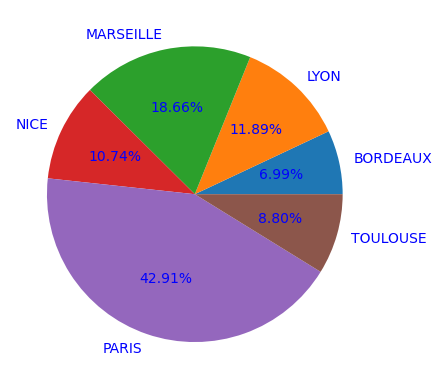

In [25]:
# Attention : mettra AUSSI le nom des villes en blanc
plt.pie(x=data['remboursement'], labels=data['ville'], autopct='%.2f%%', textprops={'color':"b"})

<BarContainer object of 6 artists>

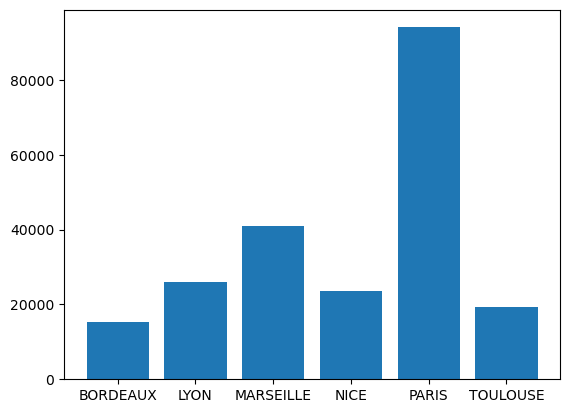

In [26]:
plt.bar(height=data['remboursement'], x=data['ville'])

<BarContainer object of 6 artists>

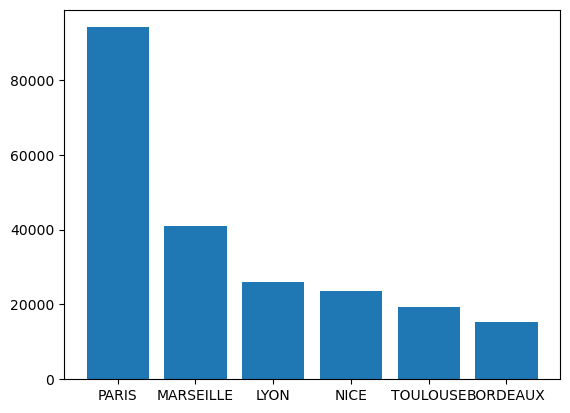

In [27]:
data_sorted = data.sort_values('remboursement', ascending=False)

plt.bar(height=data_sorted['remboursement'], x=data_sorted['ville'])

(array([38., 42., 43., 27., 31., 17., 10., 11., 15., 10.]),
 array([1200. , 1760.7, 2321.4, 2882.1, 3442.8, 4003.5, 4564.2, 5124.9,
        5685.6, 6246.3, 6807. ]),
 <BarContainer object of 10 artists>)

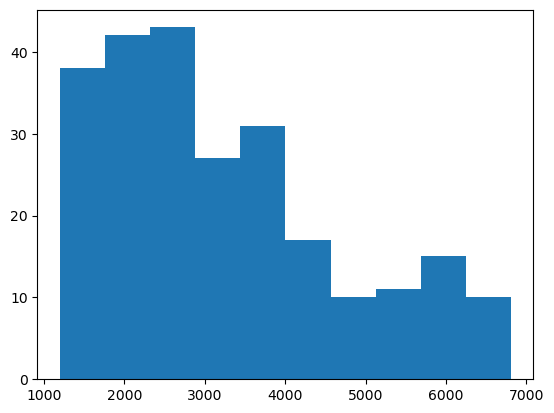

In [28]:
plt.hist(prets['revenu'])

In [31]:
df1 = prets.loc[prets['ville'] == 'TOULOUSE', :]

In [33]:
df2 = prets.loc[prets['ville'] == 'PARIS', :]

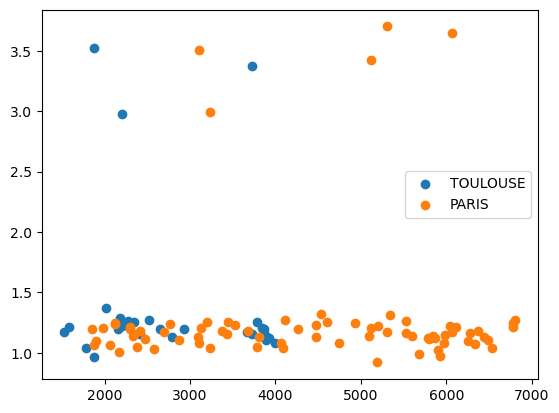

In [40]:
plt.scatter(df1['revenu'], df1['taux'], label ='TOULOUSE')
plt.scatter(df2['revenu'], df2['taux'], label ='PARIS')
plt.legend()
plt.show()

In [36]:
df2.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux,taux_endettement
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50
6,5,PARIS,75016,2476.0,836.89,240,immobilier,1.116,33.80
11,10,PARIS,75011,2293.0,378.34,240,immobilier,1.214,16.50
16,15,PARIS,75003,4109.0,1220.37,240,immobilier,1.272,29.70


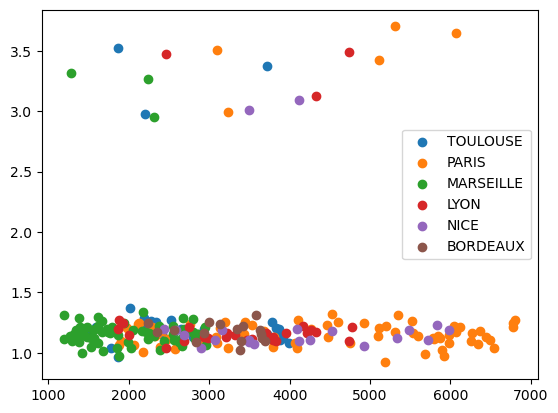

In [42]:
for ville in prets['ville'].unique():
    df = prets.loc[prets['ville'] == ville, :]
    plt.scatter(df['revenu'], df['taux'], label =ville)
plt.legend()
plt.show()

In [43]:
data = prets.groupby('ville')['remboursement'].sum()

In [44]:
data = data.reset_index()

In [45]:
data

,ville,remboursement
0,BORDEAUX,15330.59
1,LYON,26064.67
2,MARSEILLE,40895.72
3,NICE,23544.24
4,PARIS,94052.61
5,TOULOUSE,19286.18


Text(0, 0.5, 'CA réalisé en €')

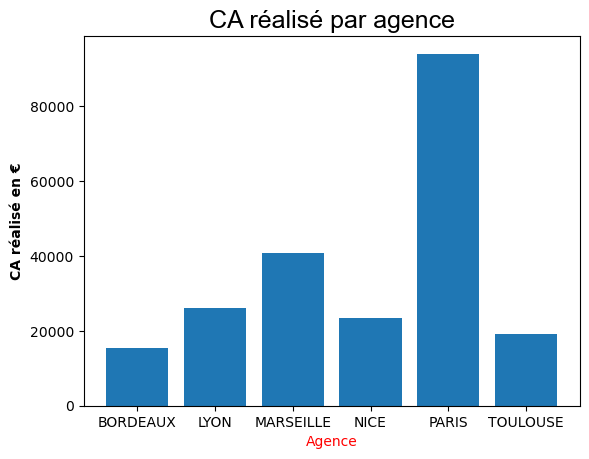

In [51]:
plt.bar(data['ville'], data['remboursement'])
plt.title('CA réalisé par agence', fontname='Arial', fontsize=18)
plt.xlabel('Agence', color='red')
plt.ylabel('CA réalisé en €', fontweight='bold')

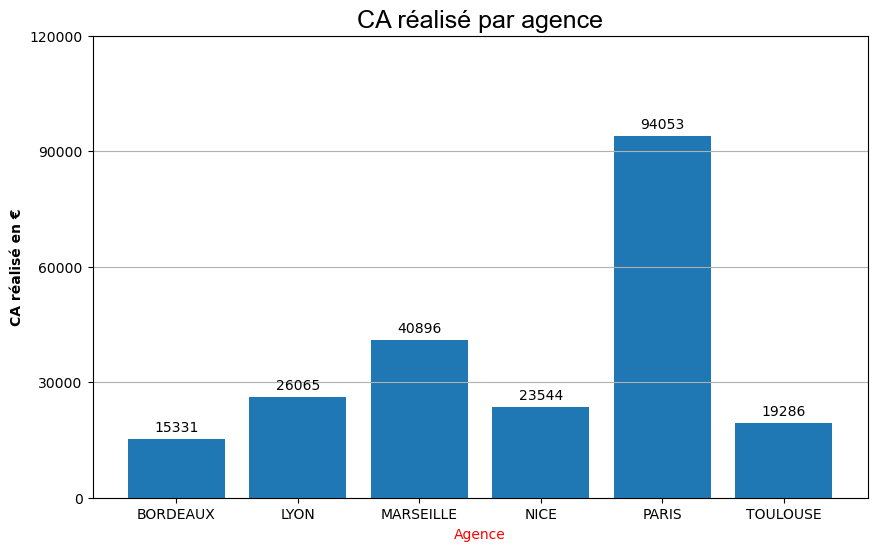

In [64]:
plt.figure(figsize=(10,6))
plt.bar(data['ville'], data['remboursement'])
plt.title('CA réalisé par agence', fontname='Arial', fontsize=18)
plt.xlabel('Agence', color='red')
plt.ylabel('CA réalisé en €', fontweight='bold')
plt.grid(axis='y')
plt.ylim(0,120000)
plt.yticks([0, 30000, 60000, 90000, 120000])
ca = data['remboursement'].tolist()
for i in range(6):
    plt.text(i-0.18, ca[i]+2000, round(ca[i]))
plt.show()

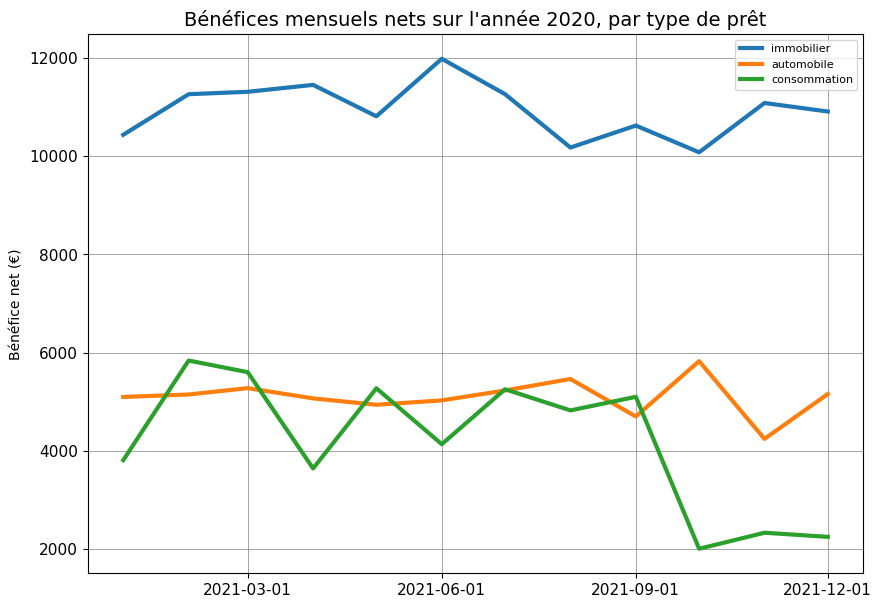

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CA = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/CA.csv')
CA['date'] = pd.to_datetime(CA['date'])

plt.figure(figsize=(10,7))
plt.plot(CA['date'], CA['immobilier'], color='#1F77B4', lw=3, label='immobilier')
plt.plot(CA['date'], CA['automobile'], color='#FF7F0E', lw=3, label='automobile')
plt.plot(CA['date'], CA['consommation'], color='#2CA02C', lw=3, label='consommation')
plt.ylabel('Bénéfice net (€)')
plt.title("Bénéfices mensuels nets sur l'année 2020, par type de prêt", fontsize=14)
plt.yticks(fontsize=11)
plt.grid(color='gray', linestyle='-', lw=0.5)
plt.xticks(['2021-03-01', '2021-06-01', '2021-09-01', '2021-12-01'], fontsize=11)
plt.legend(loc='upper right', fontsize=8)
plt.show()

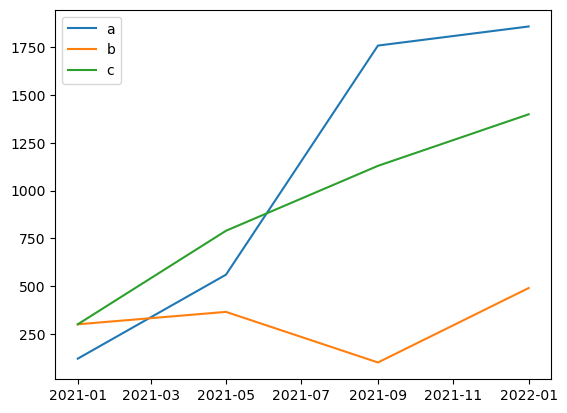

In [3]:
# création d'une Series de 4 dates

dates = pd.to_datetime(['2021-01-01', '2021-05-01', '2021-09-01', '2022-01-01'])


# création de 3 listes Y1, Y2 et Y3

Y1 = [120, 560, 1760, 1860]

Y2 = [300, 365, 100, 490]

Y3 = [300, 790, 1130, 1400]


plt.figure()

plt.plot(dates, Y1, label='a')

plt.plot(dates, Y2, label='b')

plt.plot(dates, Y3, label='c')

plt.legend()

plt.show()

In [4]:
import seaborn as sns

iris = sns.load_dataset('iris')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

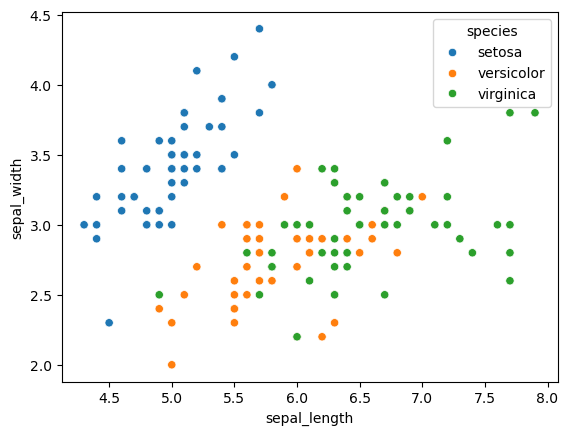

In [5]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')

In [8]:
mpg = sns.load_dataset('mpg')

In [7]:
sns.piecount(data=mpg, x='origin', autopct='%.1f%%')

AttributeError: module 'seaborn' has no attribute 'piecount'

In [11]:
origin_count = mpg['origin'].value_counts().reset_index()

sns.pie(data=origin_count, x='origin', labels='index', autopct='%.1f%%')

AttributeError: module 'seaborn' has no attribute 'pie'

In [10]:
sns.set_theme()

origin_count = mpg['origin'].value_counts().reset_index()

plt.pie(labels=origin_count['index'], x=origin_count['origin'], autopct='%.1f%%')

KeyError: 'index'